In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score


In [78]:
data={
    "x":list(range(1,8)),
    "y":[1.5,3.8,6.7,9.6,11.2,13.6,16]
}
data

{'x': [1, 2, 3, 4, 5, 6, 7], 'y': [1.5, 3.8, 6.7, 9.6, 11.2, 13.6, 16]}

## Finding m

$$\frac{(n*\sum_{i=0}^{n}Xi+Yi- \sum_{i-n}^{n}X*\sum_{i-n}^{n}Y)}{(n*\sum_{i-0}^{n}X^2)-( \sum_{i-0}^{n}X)^2}$$

In [79]:
df=pd.DataFrame(data=data)
df


,x,y
0,1,1.5
1,2,3.8
2,3,6.7
3,4,9.6
4,5,11.2
5,6,13.6
6,7,16.0


In [80]:
df['sum_xy']=df['x']*df['y']
df['sqr_x']=df['x']**2
df

,x,y,sum_xy,sqr_x
0,1,1.5,1.5,1
1,2,3.8,7.6,4
2,3,6.7,20.1,9
3,4,9.6,38.4,16
4,5,11.2,56.0,25
5,6,13.6,81.6,36
6,7,16.0,112.0,49


In [81]:
sum_x=df['x'].sum()
sum_y=df['y'].sum()
sum_xy=df['sum_xy'].sum()
sum_sqr_x=df['sqr_x'].sum()
sum_x_h_2=sum_x **2
n=len(df)
sum_x,sum_y,sum_xy,sum_sqr_x,sum_x_h_2,n


(28, 62.4, 317.2, 140, 784, 7)

In [82]:
numerator = (n*sum_xy) - (sum_x*sum_y)
numerator

473.20000000000005

In [83]:
denominator = (n*sum_sqr_x) - sum_x_h_2
denominator

196

In [84]:
m=numerator/denominator
m

2.4142857142857146

## finding b

$$\frac{\sum_{i=0}^{n}Y_{i}-m*\sum_{i=0}^{n}X_{i}}{n}$$

In [85]:
sum_x,sum_y,n,m

(28, 62.4, 7, 2.4142857142857146)

In [86]:
numerator_b = ((sum_y)-(m*sum_x))
denominator_b=n
b=numerator_b/denominator_b
b

-0.7428571428571443

In [87]:
print('m value is:',m)
print('b value is:',b)

m value is: 2.4142857142857146
b value is: -0.7428571428571443


In [88]:
y_pred = [(m*x_val) + b for x_val in df['x']]
y_pred

[1.6714285714285704,
 4.0857142857142845,
 6.499999999999999,
 8.914285714285715,
 11.32857142857143,
 13.742857142857144,
 16.15714285714286]

In [89]:
df['y_pred'] = [(m*x_val) +b for x_val in df['x']]
df

,x,y,sum_xy,sqr_x,y_pred
0,1,1.5,1.5,1,1.671429
1,2,3.8,7.6,4,4.085714
2,3,6.7,20.1,9,6.500000
3,4,9.6,38.4,16,8.914286
4,5,11.2,56.0,25,11.328571
5,6,13.6,81.6,36,13.742857
6,7,16.0,112.0,49,16.157143


## SQUARED ERROR

$$\sum_{i=0}^{n}(y_{org}-y_{pred})^{2}$$

In [90]:
se = sum([(yorg -ypred)**2 for yorg, ypred in zip(df['y'],df['y_pred'])])/n
se

0.09755102040816321

## Linear Regression in OOPS

In [91]:
class linear_regression:
    def __init__(self,df):
        self.n=len(df)
        self.sum_x=df['x'].sum()
        self.sum_y=df['y'].sum()
        self.sum_xy=df['sum_xy'].sum()
        self.sum_sqr_x=df['sqr_x'].sum()
        self.sum_x_h_2=sum_x **2
        
    
    def m_val(self,n,sum_x,sum_y,sum_xy,sum_x2,sum_x_h_2):
        self.numerator_m = n*((sum_xy)) - (sum_x)*(sum_y)
        self.denominator_m = n*(sum_x2) - (sum_x_h_2)
        self.m = self.numerator_m / self.denominator_m
        return self.m
    
    def b_val(self,n,sum_x,sum_y):
        self.numerator_b=(sum_y)-m*(sum_x)
        self.denominator_b=n
        self.b=self.numerator_b/self.denominator_b
        return self.b
    
    def fit_train(self,m,b,df):
        self.y_pred = [(m*x_val) + b  for x_val in df['x']]
        return self.y_pred
    
    def mse_val (self,df,y_pred):
        diff1=[]
        for y_org, y_pred in zip(df['y'],y_pred):
            diff=(y_org - y_pred) **2
            diff1.append(diff)
            sse=sum(diff1)
            mse=sse/n
            return mse
        
    def mae_val(self,df,y_pred):
        diff1=[]
        
        for y_org, y_pred in zip(df['y'],y_pred):
            
            diff = abs(y_org - y_pred)
            diff1.append(diff)
            
        ss2 = sum(diff1)
        mae = ss2/n
        return mae

In [92]:
obj_m = linear_regression(df)
obj_m.m_val(n,sum_x,sum_y,sum_xy,sum_sqr_x,sum_x_h_2)
print('m value is:',m)

m value is: 2.4142857142857146


In [93]:
obj_y_pred=linear_regression(df)
obj_y_pred.fit_train(m,b,df)
print('y predict values is:',y_pred)

y predict values is: [1.6714285714285704, 4.0857142857142845, 6.499999999999999, 8.914285714285715, 11.32857142857143, 13.742857142857144, 16.15714285714286]


In [94]:
obj_b = linear_regression(df)
obj_b.b_val(n,sum_x,sum_y)
print('m value is:',b)

m value is: -0.7428571428571443


In [95]:
obj_mse = linear_regression(df)
mse = obj_mse.mse_val(df,y_pred)
print('mean square error value:',mse)

mean square error value: 0.004198250728862922


In [96]:
obj_mae = linear_regression(df)
mae = obj_mae.mae_val(df,y_pred)
print('mean absolute error value:',mae)

mean absolute error value: 0.25306122448979623


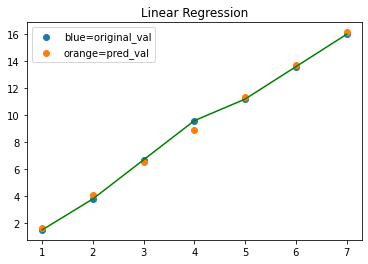

In [97]:
x_val = df['x']
y_org = df['y']
y_pre = y_pred

plt.plot(x_val,y_org,color='g')
plt.scatter(x_val,y_org,label='blue=original_val')
plt.scatter(x_val,y_pred,label='orange=pred_val')
plt.title("Linear Regression")
plt.legend()
plt.show()